In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Di bagian ini, kita mengimpor beberapa library utama yang dibutuhkan dalam analisis data dan pemodelan.
pandas digunakan untuk membaca dan mengolah data berbentuk tabel, numpy membantu dalam operasi numerik, dan matplotlib.pyplot serta seaborn dipakai untuk membuat visualisasi hasil analisis supaya lebih mudah dipahami.

In [51]:
regresi = pd.read_csv('excercises.csv')

print("=== Data Regresi ===")
print(regresi.head())
print(regresi.info())
print(regresi.describe())

=== Data Regresi ===
   Daily Exercise Time (X)  Weight Loss (Y)
0                      0.5              0.2
1                      1.0              0.4
2                      1.5              0.7
3                      2.0              1.0
4                      1.0              0.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Daily Exercise Time (X)  74 non-null     float64
 1   Weight Loss (Y)          74 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB
None
       Daily Exercise Time (X)  Weight Loss (Y)
count                74.000000        74.000000
mean                  2.124324         1.001351
std                   1.021121         0.567980
min                   0.400000         0.200000
25%                   1.225000         0.500000
50%                   2.050000         1.000000
75%             

Pada cell ini, dataset exercises.csv dibaca menggunakan pandas. Setelah itu dilakukan pengecekan awal seperti menampilkan beberapa data teratas dengan head(), memeriksa tipe data dan jumlah nilai kosong melalui info(), serta melihat statistik dasarnya lewat describe().
Langkah ini penting untuk memahami bentuk dan isi data sebelum dilakukan pemrosesan lebih lanjut.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = regresi[['Daily Exercise Time (X)']]
y = regresi['Weight Loss (Y)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

Di tahap ini, variabel independen (fitur) dan variabel dependen (target) dipisahkan.
Daily Exercise Time (X) digunakan sebagai input (X), sedangkan Weight Loss (Y) sebagai output (y).
Setelah itu, data dibagi menjadi dua bagian menggunakan train_test_split yaitu data latih (train) dan data uji (test), dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian. Tujuannya agar model bisa diuji pada data yang belum pernah dilihat sebelumnya.

In [55]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_s, y_train)

y_pred = model.predict(X_test_s)

Pada bagian ini dilakukan proses standarisasi data menggunakan StandardScaler dari sklearn.
Proses ini membuat semua nilai pada fitur memiliki skala yang sebanding, terutama ketika satuan data berbeda.
Data training di-fit_transform, sedangkan data testing hanya di-transform agar tidak terjadi kebocoran informasi dari data uji.

In [57]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Evaluasi Model Regresi ===")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R2 Score: {r2:.3f}")

=== Evaluasi Model Regresi ===
Mean Squared Error (MSE): 0.003
R2 Score: 0.992


Di cell ini model regresi linear dibuat dengan LinearRegression() dari sklearn.
Model kemudian dilatih (fit) menggunakan data training yang sudah distandarisasi.
Selanjutnya dilakukan prediksi pada data testing, hasilnya disimpan dalam y_pred.

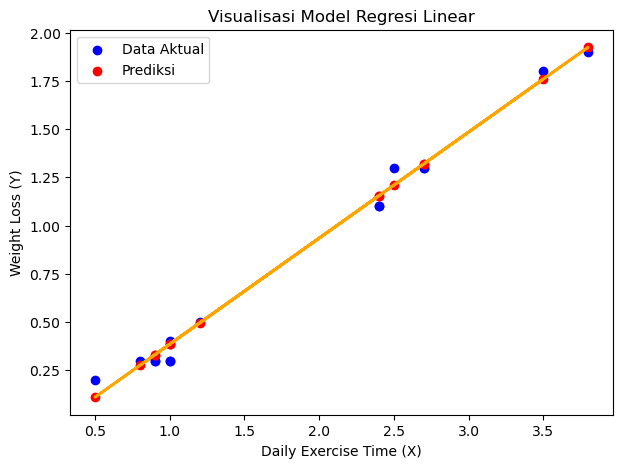

In [59]:
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, color='blue', label='Data Aktual')
plt.scatter(X_test, y_pred, color='red', label='Prediksi')
plt.plot(X_test, y_pred, color='orange', linewidth=2)
plt.title('Visualisasi Model Regresi Linear')
plt.xlabel('Daily Exercise Time (X)')
plt.ylabel('Weight Loss (Y)')
plt.legend()
plt.show()

Tahap ini digunakan untuk mengukur seberapa baik model bekerja.
Kita menghitung dua metrik, yaitu Mean Squared Error (MSE) dan R² Score.

MSE menunjukkan seberapa besar rata-rata kesalahan prediksi.

R² menggambarkan seberapa besar variasi data yang bisa dijelaskan oleh model.

Visualisasi dibuat dengan matplotlib menggunakan scatter plot antara data asli dan hasil prediksi agar terlihat seberapa dekat model dalam memprediksi.

In [61]:
bank = pd.read_csv('bank_customers.csv', sep=';')

print("\n=== Data Klasifikasi ===")
print(bank.head())
print(bank.info())


=== Data Klasifikasi ===
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data colu

Dataset kedua, yaitu bank_customers.csv, digunakan untuk kasus klasifikasi dengan metode Naive Bayes.
Langkah awal sama seperti sebelumnya — membaca data, menampilkan isi, dan memeriksa struktur serta tipe datanya menggunakan info().

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = bank.drop('y', axis=1)
y = bank['y']

le = LabelEncoder()
for c in X.columns:
    if X[c].dtype == 'object':
        X[c] = le.fit_transform(X[c])

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Di tahap ini, kolom target y (hasil prediksi) dipisahkan dari fitur lainnya (X).
Karena beberapa kolom memiliki tipe data kategori, maka digunakan LabelEncoder untuk mengubah teks menjadi angka agar bisa diolah oleh model.
Kemudian, data kembali dibagi menjadi data latih dan data uji dengan proporsi yang sama seperti sebelumnya.

In [65]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

Model klasifikasi dibuat dengan GaussianNB() yang cocok untuk data numerik dan bersifat probabilistik.
Model dilatih menggunakan data training, lalu digunakan untuk memprediksi data testing.
Hasil prediksi kemudian dibandingkan dengan label asli untuk menilai performanya.

In [67]:
from sklearn.metrics import accuracy_score, classification_report

print("=== Evaluasi Model Naive Bayes ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Evaluasi Model Naive Bayes ===
Akurasi: 0.829

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      7952
           1       0.34      0.46      0.39      1091

    accuracy                           0.83      9043
   macro avg       0.63      0.67      0.65      9043
weighted avg       0.85      0.83      0.84      9043



Bagian ini berfokus pada evaluasi hasil klasifikasi.
Dihitung akurasi (seberapa banyak prediksi benar) dan ditampilkan laporan lengkap dengan precision, recall, dan f1-score lewat classification_report.
Selain itu, digunakan confusion matrix untuk memperlihatkan distribusi hasil prediksi model terhadap data aktual.
Visualisasi confusion matrix dibuat dengan seaborn.heatmap agar lebih mudah dibaca dan menarik dilihat.

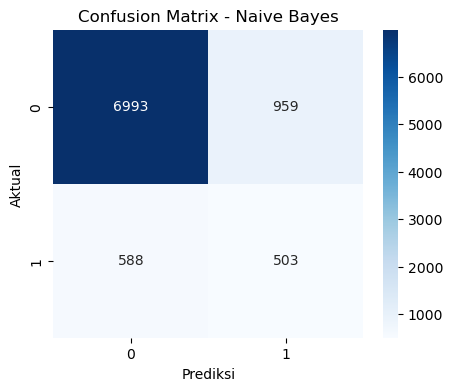

In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Pada tahap ini dilakukan visualisasi tambahan untuk melihat hasil klasifikasi model Naive Bayes secara lebih jelas.
Visualisasi seperti confusion matrix atau grafik perbandingan prediksi membantu memahami area mana yang sering salah diprediksi dan seberapa baik model mengenali tiap kelas.
Langkah ini berguna sebagai evaluasi tambahan untuk memperbaiki performa model di tahap berikutnya.